<a href="https://colab.research.google.com/github/henrykohl/Machine-Learning-demo-repo/blob/master/JamesLearningNote/4-2BikeSharingDemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.2

## <font color="red">首先先下載資料、並在Jupyter notebook裡面載入資料

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
pd.options.mode.chained_assignment = None

In [ ]:
%matplotlib inline

In [ ]:
train = pd.read_csv('BikeSharingDemand/train.csv')
test = pd.read_csv('BikeSharingDemand/test.csv')
submit = pd.read_csv('BikeSharingDemand/sampleSubmission.csv')

## 都沒有空值，真的hen棒?

In [ ]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


<font color="red">使用Info看train, test的資料來觀察是否有空值？此時發現資料處理得很好都沒有空值！但別開心得太早！(保持對資料的警覺，有可能他們提供的資料先被一些不好的方法的填補了空值)

* <font color="red">使用info()看Train資料型態以及是否有空值

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


<font color="red">在看資料分布的時候，我們發現最後右邊的欄位count(有點被切到)中的50百分位數為145, 75百分位數為284以及 max值為977相差非常巨大，因此可以判斷有Outlier，可以使用最簡單的超出三倍標準差概念將這些Outlier先去掉，避免對Model造成影響，去掉Outlier之後的預測分數也會明顯提升。

* <font color="red">使用describe看Train資料分布狀況

In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


## Feature Engineering

* <font color="red">去掉outlier

In [ ]:
print ("Shape Of The Before Ouliers: ",train.shape)
train = train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())]
print ("Shape Of The After Ouliers: ",train.shape)

Shape Of The Before Ouliers:  (10886, 12)
Shape Of The After Ouliers:  (10739, 12)


<font color="red">由於接下來要將時間處理成讓Random forest可以分析的格式，我們將時間拆成日期、小時、年、星期幾、月份的欄位（日期之後不會用到主要是用來算星期幾以及月份）。由於Train跟Test的資料都要做這樣的處理，因此我們先把Train, Test Data合併後一起處理。

* <font color="red">合併train以及test data

In [ ]:
# data = train.append(test) # 有警告
data = pd.concat([train, test], axis=0)
data.reset_index(inplace=True)       # index會被重新設定，還會產生一個新column名稱就叫index
data.drop('index', inplace=True, axis=1) # 將前一行新產生的column名為index，刪除掉

* <font color="red">處理時間格式

In [ ]:
data["date"] = data.datetime.apply(lambda x : x.split()[0])
# data["date"] = data['datetime'].apply(lambda x : x.split()[0]) # 也可以

data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)


In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0,2011-01-01,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0,2011-01-01,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0,2011-01-01,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0,2011-01-01,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0,2011-01-01,4,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17227,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,19,2012,0,12
17228,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,20,2012,0,12
17229,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN,2012-12-31,21,2012,0,12
17230,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN,2012-12-31,22,2012,0,12


<font color="red">接著我們來看數值(metric)像是溫度(temp)、體感溫度(atemp)、濕度(humidity)、風速(windspeed)的資料分佈情況，使用seaborn的displot來呈現，displot是由兩種圖組成的：直方圖＋核密度函數(直方圖就是國中小學的直方圖、核密度函數可參考: 什么是核密度估计？如何感性认识？) ，但這邊只是要看分佈而已，所以沒有這些知識也沒關係。在下方四張圖裡面我們可以觀察到一個非常重要的關鍵！在右下方風速的圖可以發現風速為0的值非常多，而靠近0的(大約風速6,7以內都沒有出現)，中間也出現許多沒有任何值的情況，因此可以大概推論風速0是風速太小量不到或是只要是風速為空值都被資料提供方補上0！這種的0會對大部分的模型造成預估失準，因此我們要將風速為0的值重新估計。

[Text(0.5, 0, 'windspeed'), Text(0.5, 1.0, 'distribution of windspeed')]

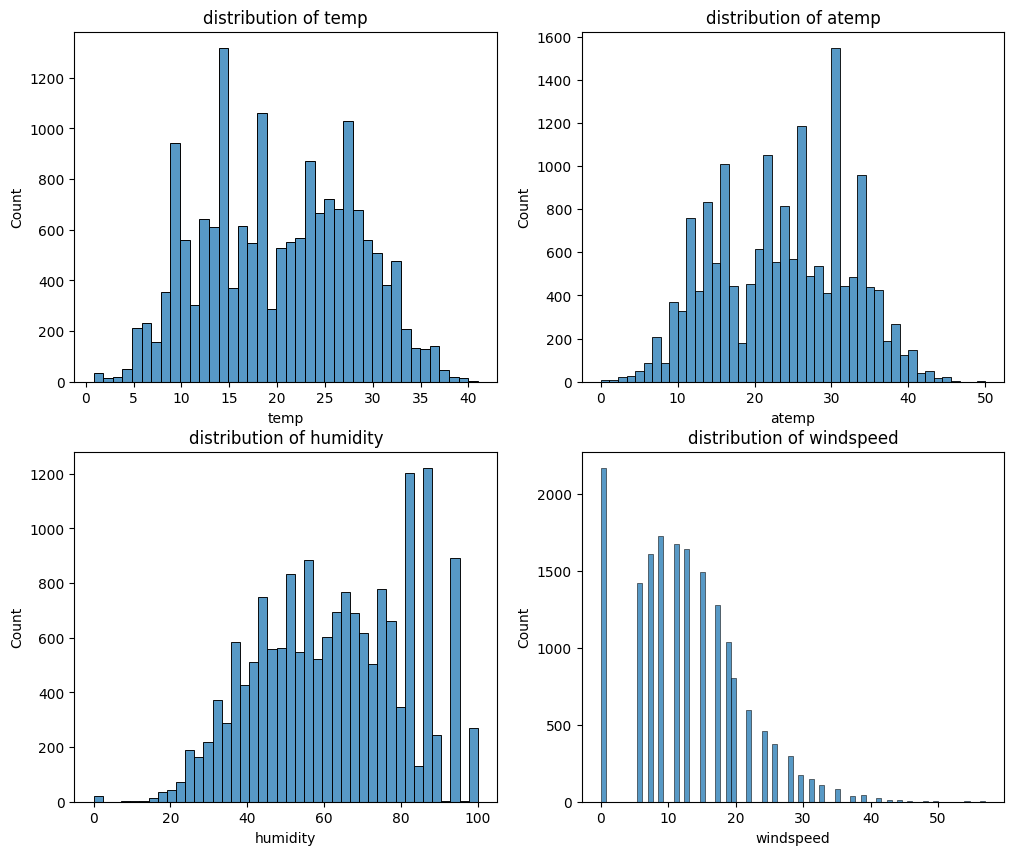

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)

# sns.distplot(data["temp"],ax=axes[0][0])
# sns.distplot(data["atemp"],ax=axes[0][1])
# sns.distplot(data["humidity"],ax=axes[1][0])
# sns.distplot(data["windspeed"],ax=axes[1][1])
# distplot方法被廢棄了

sns.histplot(data["temp"],ax=axes[0][0])
sns.histplot(data["atemp"],ax=axes[0][1])
sns.histplot(data["humidity"],ax=axes[1][0])
sns.histplot(data["windspeed"],ax=axes[1][1])

axes[0][0].set(xlabel='temp',title="distribution of temp")
axes[0][1].set(xlabel='atemp',title="distribution of atemp")
axes[1][0].set(xlabel='humidity',title="distribution of humidity")
axes[1][1].set(xlabel='windspeed',title="distribution of windspeed")

<font color="red">我們先將資料分成風速為0以及風速不為0的資料，並且用風速不為0的資料來訓練random forest的模型，將訓練好的模型來預估風速為0的風速到底是多少。由下圖中可以看到我們已將風速為0的資料重新預估後去填補了空隙，這樣的做法可以明顯提升預測的準度。

In [ ]:
dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor(n_estimators=1000,random_state=42)
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0.loc[:,"windspeed"] = wind0Values
# data = dataWindNot0.append(dataWind0) # 廢棄了
data = pd.concat([dataWindNot0,dataWind0],axis=0)

data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

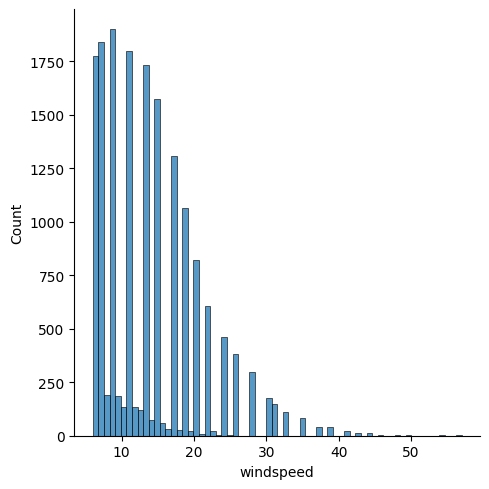

In [ ]:
# sns.distplot(data["windspeed"])
sns.displot(data["windspeed"])

<font color="red">最後一個小技巧是我們去觀察腳踏車出借數量(count)的資料分佈，可以發現原本的資料非常歪斜(Skew)，也就是不符合常態分佈。透過取Log的方式，來讓資料分布較為接近常態分佈，這樣的技巧也可以讓預估上更準確。


In [ ]:
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"] # 最後建立submission時會用到
yLabels = dataTrain["count"]
yLabelsLog = np.log(yLabels)

In [ ]:
dropFeatures = ['casual',"count","datetime","date","registered"]
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

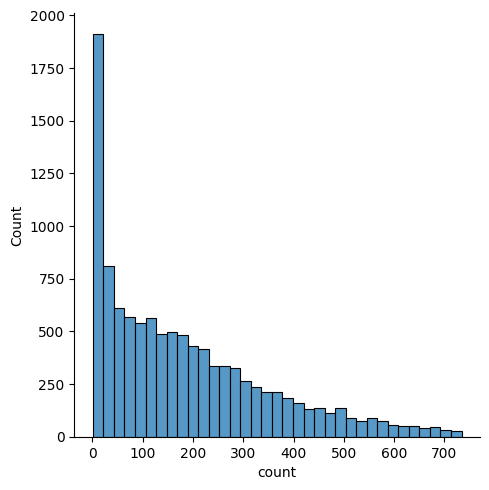

In [ ]:
# sns.distplot(yLabels)
sns.displot(yLabels)

<font color="red">可以看到取Log後的資料更接近常態分佈了。

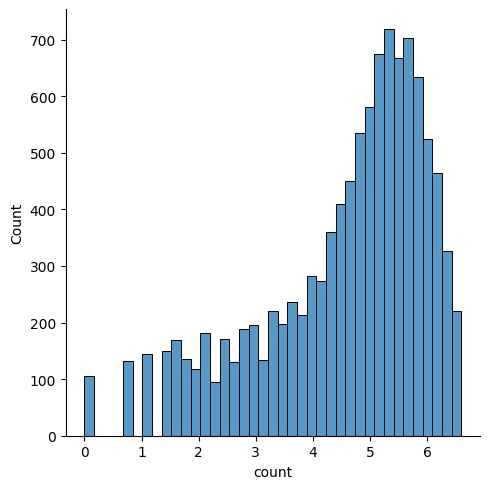

In [ ]:
# sns.distplot(yLabelsLog)
sns.displot(yLabelsLog)

<font color="red">最後將資料丟進Random forest train並且輸出結果到csv，接著上傳此csv檔就可以獲得大約17%的排名了！整段程式大約跑1~5分鐘，Random forest模型的參數這邊只做了n_estimators =1000這個非常基本的設定，random_state =42主要是隨機的方式，有點像是在洗撲克牌時洗牌的方式，透過設定一個固定的值，每個人跑這隻程式輸出的結果會跟我一模一樣。這個值可以設定任何數字，42的原因是因為Kaggle上面大家很喜歡用42這個數字，而這個數字的來源是一本在工程師圈很有名的小說-銀河便車指南。

In [ ]:
rfModel = RandomForestRegressor(n_estimators=1000,random_state=42)
# yLabelsLog = np.log(yLabels)     # 多餘 前面已執行過了
rfModel.fit(dataTrain,yLabelsLog)
# preds = rfModel.predict(X= dataTrain) # 多餘 對training data執行count預測 沒有意義

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
predsTest = rfModel.predict(X= dataTest)
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(predsTest)]
    })
submission.to_csv('bike_predictions_RF.csv', index=False)

In [ ]:
submission

,datetime,count
9442,2011-01-20 00:00:00,10.741879
16365,2011-01-20 01:00:00,4.853517
16366,2011-01-20 02:00:00,2.925504
9443,2011-01-20 03:00:00,3.048532
9444,2011-01-20 04:00:00,2.582506
...,...,...
15063,2012-12-31 19:00:00,287.244830
15064,2012-12-31 20:00:00,197.939089
15065,2012-12-31 21:00:00,137.997122
15066,2012-12-31 22:00:00,108.633856
